#Imports

In [4]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630154 sha256=1551ffaf3e9c68b8adea8d411367c67ed54354e9f76c3a7fae5c891cccd939c1
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [35]:
import csv
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd

#Load Data

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv")
test = pd.read_csv("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/test.csv")
train = pd.read_csv("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/train.csv")

#Basic Visualizations

In [30]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()
dataset = Dataset.load_from_df(data, reader)

algo = SVD()

trainset = dataset.build_full_trainset()
algo.fit(trainset)
V_tilde = algo.qi.T
# results = cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

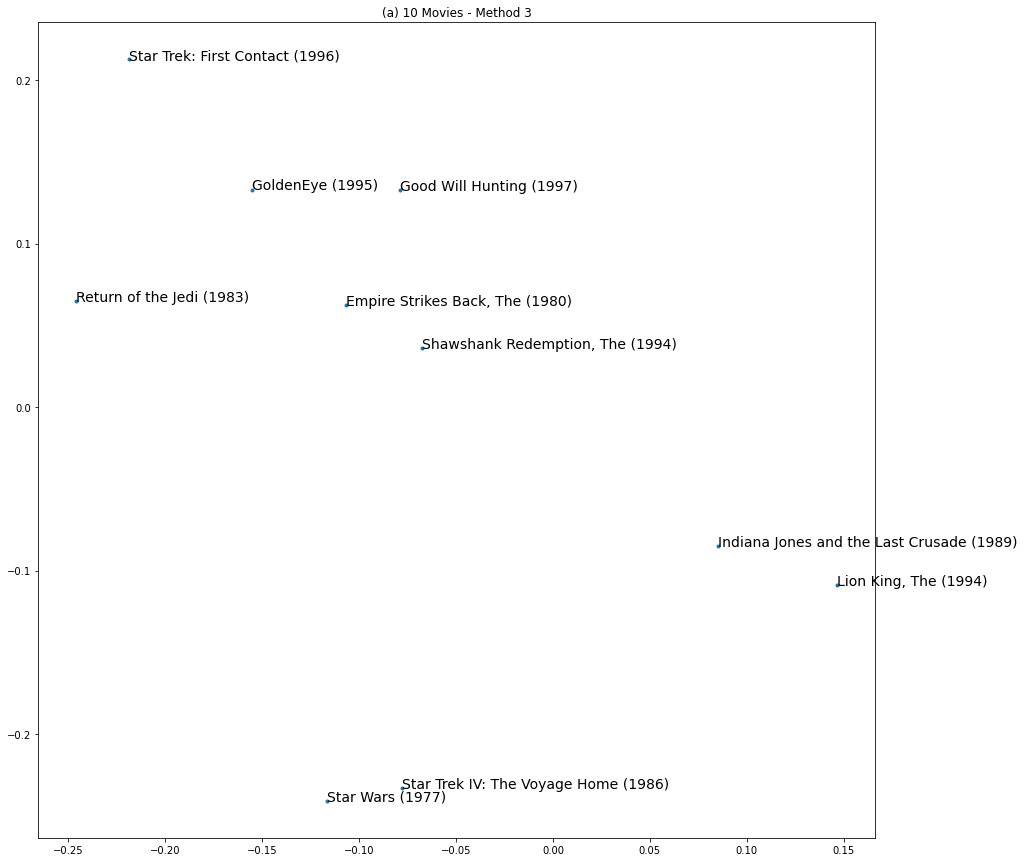

In [31]:
# Any 10 movies of our choice - Method 3
movie_names = np.array(movies)[:,1]
movie_indices = np.array([1, 49, 63, 70, 171, 180, 209, 221, 229, 271])
movie_coordinates = V_tilde[:, movie_indices] 
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(a) 10 Movies - Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()

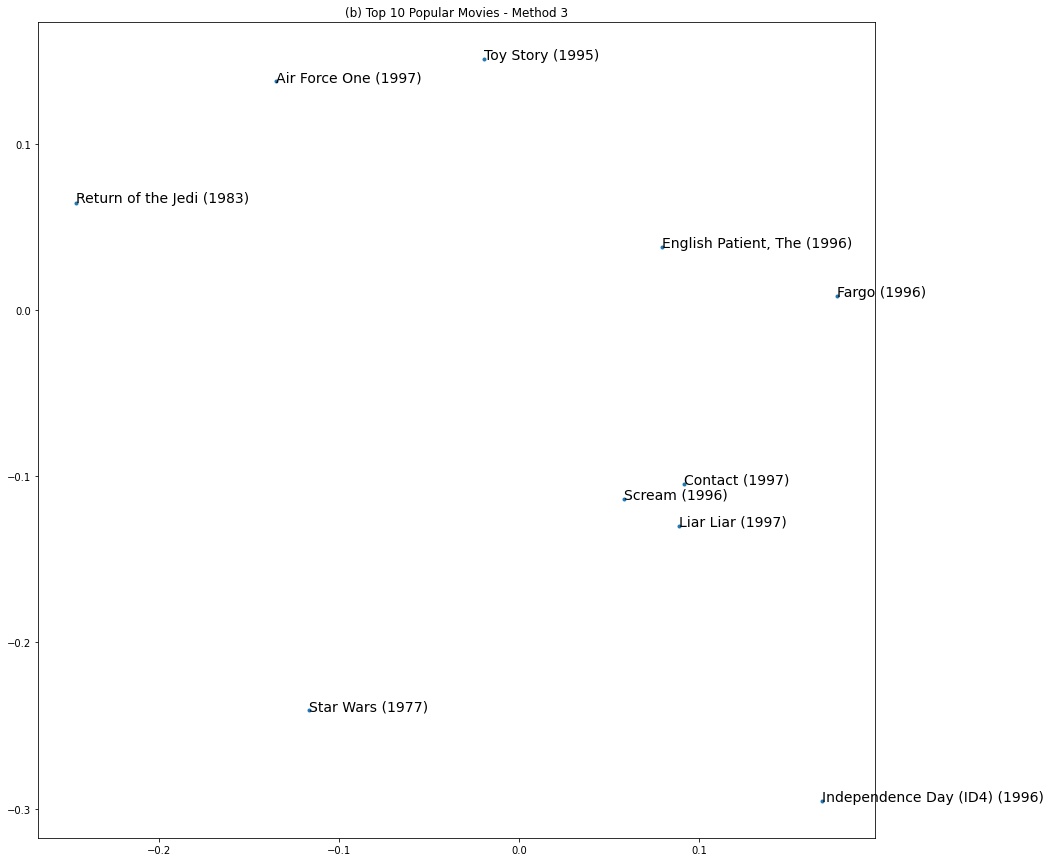

In [32]:
# 10 most popular movies (by most ratings) - Method 3
top10popular = np.array(data["Movie ID"].value_counts().nlargest(10).index)

movie_names = np.array(movies)[:,1]
movie_indices = [idx - 1 for idx in top10popular]
movie_coordinates = V_tilde[:, movie_indices]
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(b) Top 10 Popular Movies - Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()

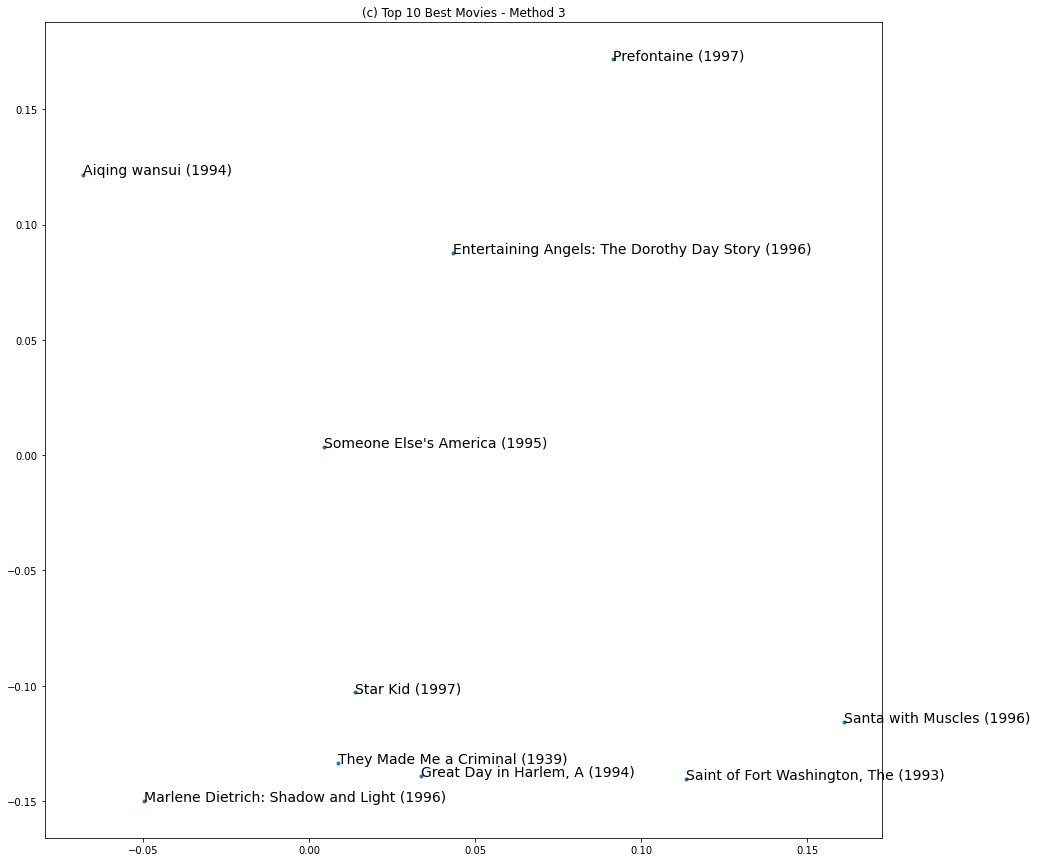

In [33]:
# 10 best movies (by highest average ratings) - Method 3
top10best = data.groupby(by='Movie ID').mean().sort_values(by=['Rating'], ascending=False).nlargest(10, "Rating").index

movie_names = np.array(movies)[:,1]
movie_indices = [idx - 1 for idx in top10best]
movie_coordinates = V_tilde[:, movie_indices]
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(c) Top 10 Best Movies - Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()

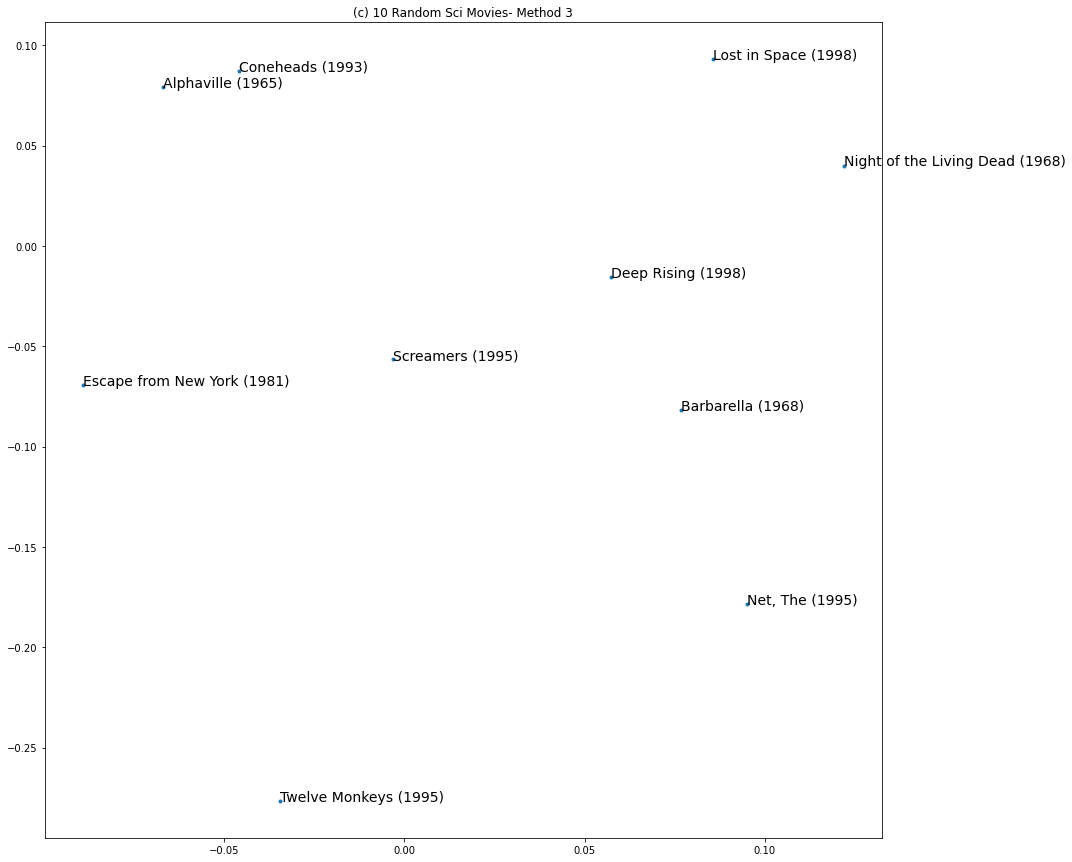

In [36]:
# 10 Random Sci Movies - Method 3
scifimovies = np.array(movies[movies['Sci-Fi']==1]['Movie ID'])
scifimovies = scifimovies[random.sample(range(0, len(scifimovies)), 10)]

movie_names = np.array(movies)[:,1]
movie_indices = [idx - 1 for idx in scifimovies]
movie_coordinates = V_tilde[:, movie_indices]
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(c) 10 Random Sci Movies- Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()

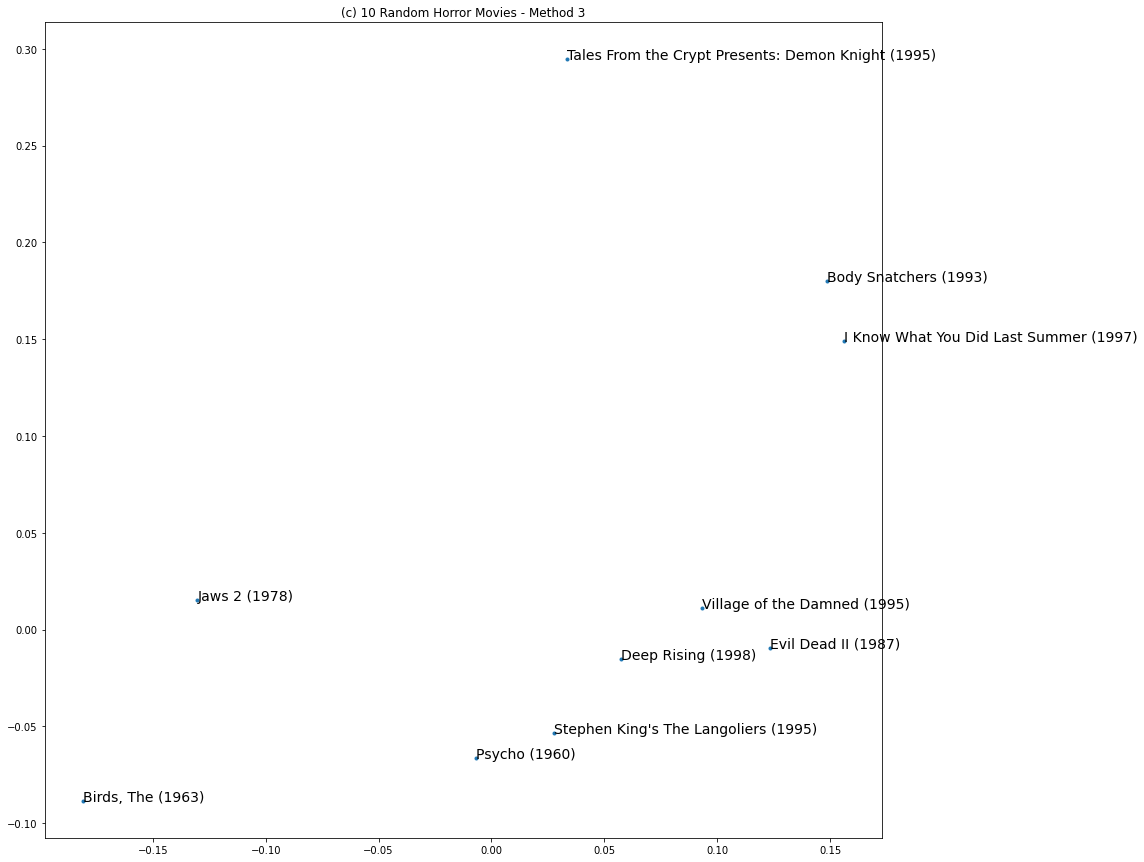

In [38]:
horrormovies = movies[movies['Horror']==1]['Movie ID']
# 10 Random Horror Movies - Method 3
horrormovies = np.array(movies[movies['Horror']==1]['Movie ID'])
horrormovies = horrormovies[random.sample(range(0, len(horrormovies)), 10)]

movie_names = np.array(movies)[:,1]
movie_indices = [idx - 1 for idx in horrormovies]
movie_coordinates = V_tilde[:, movie_indices]
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(c) 10 Random Horror Movies - Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()

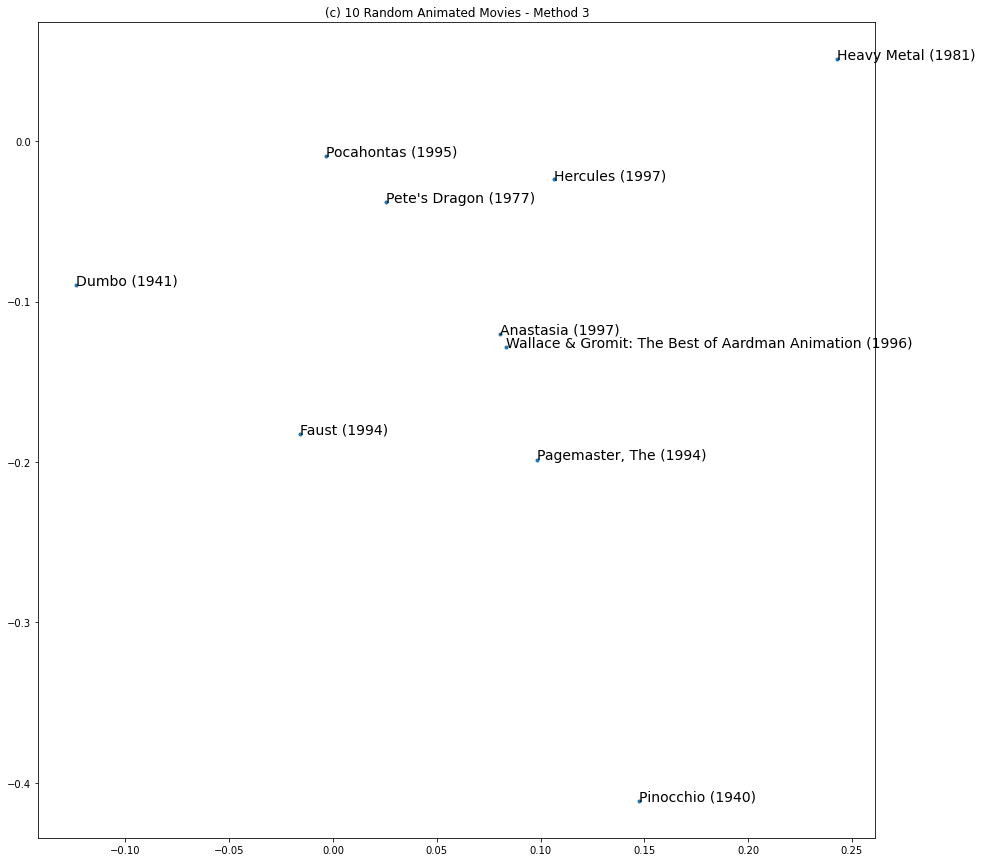

In [39]:
# 10 Random Animated Movies - Method 3
animatedmovies = np.array(movies[movies['Animation']==1]['Movie ID'])
animatedmovies = animatedmovies[random.sample(range(0, len(animatedmovies)), 10)]

movie_names = np.array(movies)[:,1]
movie_indices = [idx - 1 for idx in animatedmovies]
movie_coordinates = V_tilde[:, movie_indices]
movie_labels = movie_names[movie_indices]
plt.figure(figsize=(15,15))
plt.plot(movie_coordinates[0], movie_coordinates[1], '.')
plt.title("(c) 10 Random Animated Movies - Method 3")
for i, label in enumerate(movie_labels):
  plt.annotate(label, (movie_coordinates[0, i], movie_coordinates[1, i]), fontsize = 14)
plt.show()